# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fares/ride_count
average_fare_per_ride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares/driver_count
average_fare_per_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Type": ["Rural", "Suburban", "Urban"],
                                 "Total Rides": ride_count,
                                 "Total Drivers": driver_count,
                                 "Total Fares": total_fares,
                                 "Average Fare Per Ride": average_fare_per_ride,
                                 "Average Fare Per Driver": average_fare_per_driver})
pyber_summary_df.set_index(["Type"], inplace= True)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df = pd.DataFrame({"Total Rides": ride_count,
                                 "Total Drivers": driver_count,
                                 "Total Fares": total_fares,
                                 "Average Fare Per Ride": average_fare_per_ride,
                                 "Average Fare Per Driver": average_fare_per_driver})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# using double brackets on "fare" makes it a dataframe, single bracket would make it a series and then 
# we would have to convert it
type_date_summed_fares_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
type_date_summed_fares_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36 $43.69
      2019-01-02 11:18:32 $52.12
      2019-01-03 19:51:01 $19.90
      2019-01-04 03:31:26 $24.88
      2019-01-06 07:38:40 $47.33

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_date_summed_fares_df = type_date_summed_fares_df.reset_index()
type_date_summed_fares_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,$43.69
1,Rural,2019-01-02 11:18:32,$52.12
2,Rural,2019-01-03 19:51:01,$19.90
3,Rural,2019-01-04 03:31:26,$24.88
4,Rural,2019-01-06 07:38:40,$47.33


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_summed_fares_pivot = type_date_summed_fares_df.pivot(index="date", columns="type", values="fare")
type_date_summed_fares_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
2019-01-01 09:45:36,$43.69,NaN,NaN
2019-01-01 12:32:48,NaN,$25.56,NaN
2019-01-01 14:40:14,NaN,NaN,$5.42
2019-01-01 14:42:25,NaN,NaN,$12.31


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
select_dates = type_date_summed_fares_pivot.loc['2019-01-01':'2019-04-29']
select_dates_df = pd.DataFrame(select_dates)
select_dates

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,$11.46
2019-04-28 16:29:16,NaN,NaN,$36.42
2019-04-28 17:26:52,NaN,NaN,$31.43


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
select_dates_df.index = pd.to_datetime(select_dates_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
select_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

select_dates_df = select_dates_df.resample("W").sum()
select_dates_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"


KeyError: 'date'

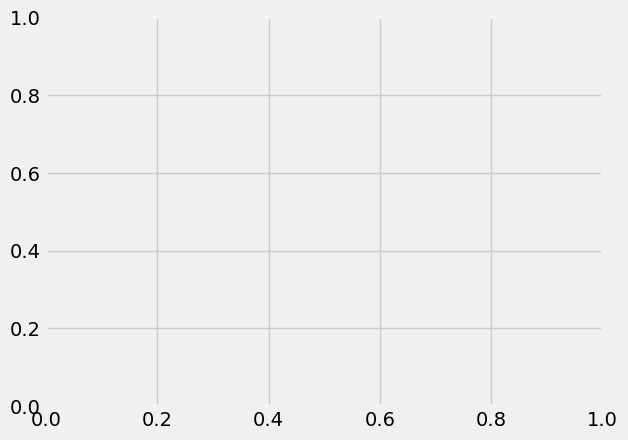

In [44]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


axes = plt.gca()

# pass the axes object to plot function
select_dates_df.plot(kind='line', x='date', y='fare', ax=axes);
select_dates_df.plot(kind='line', x='date', y='fare', ax=axes);
select_dates_df.plot(kind='line', x='date', y='fare', ax=axes)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


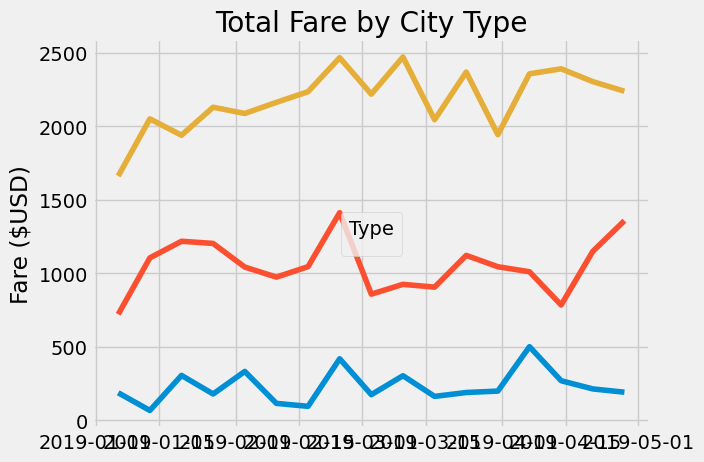

In [41]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

x_labels = ["January", "February", "March", "April"]

fig, ax = plt.subplots()
ax.plot(select_dates_df)
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("")

#select_dates_df.plot()

#details

lgnd = ax.legend(loc="center", title="Type")

TypeError: cannot unpack non-iterable AxesSubplot object

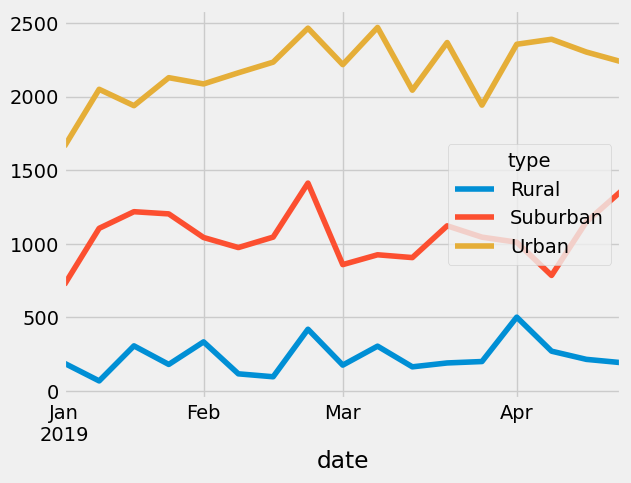

In [34]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("")


fig, ax = select_dates_df.plot()

#select_dates_df.plot()

#details

lgnd = ax.legend(loc="center", title="Type") 


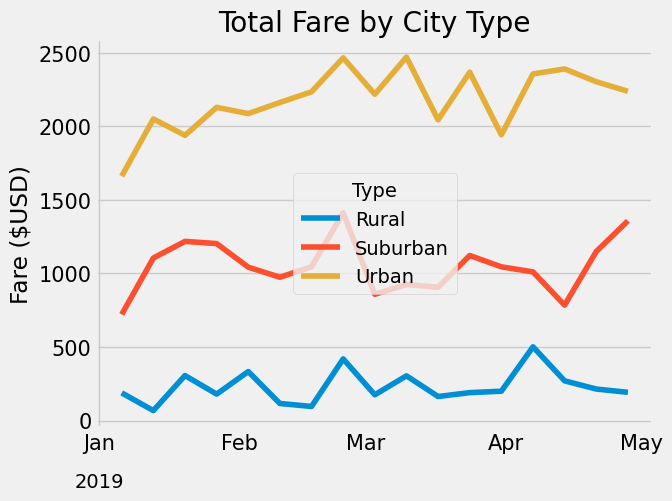

In [29]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig = plt.figure()
ax = fig.add_subplot()

#x_axis = select_dates["types"]
ax.plot(select_dates_df["Rural"], label="Rural")
ax.plot(select_dates_df["Suburban"], label="Suburban")
ax.plot(select_dates_df["Urban"], label="Urban")

#details
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")

#set months
#ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(
    #mdates.ConciseDateFormatter(mdates.DateFormatter('%b'), offset_formats=['', '%Y', '%Y-%b', '%Y-%b-%d', '%Y-%b-%d', '%Y-%b-%d %H:%M']))

# Minor ticks every month.
fmt_month = mdates.MonthLocator()

# Minor ticks every year.
fmt_year = mdates.YearLocator()
ax.xaxis.set_minor_locator(fmt_month)

# '%b' to get the names of the month
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# fontsize for month labels
ax.tick_params(labelsize=15, which='both')

# create a second x-axis beneath the first x-axis to show the year in YYYY format
sec_xaxis = ax.secondary_xaxis(-0.1)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Hide the second x-axis spines and ticks
sec_xaxis.spines['bottom'].set_visible(False)    
    
    
#get legend
lgnd = ax.legend(loc="center", title="Type") 
ax.grid(True)
plt.savefig("Analysis/Total_Fare_by_City_Type.png")
plt.show()
